In [1]:
## Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

from time import time

In [2]:
# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
data = pd.read_csv('german_.data.csv', header=0, names = ["chk_acct", "duration", "credit_his", "purpose", 
                            "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
                            "present_resid", "property", "age", "other_install", "housing", "n_credits", 
                            "job", "n_people", "telephone", "foreign", "response"])
data.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,no
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,yes
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,no
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,no
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,yes


In [42]:
import pandas as pd

# -----------------------------
# Mapping dictionaries
# -----------------------------

chk_acct_map = {
    'A11': '< 0 €',
    'A12': '0–200 €',
    'A13': '≥ 200 €',
    'A14': 'No checking account'
}

saving_acct_map = {
    'A61': '< 100 €',
    'A62': '100–500 €',
    'A63': '500–1000 €',
    'A64': '≥ 1000 €',
    'A65': 'No / unknown savings'
}

credit_his_map = {
    'A30': 'No previous credit / all paid',
    'A31': 'All credits paid duly',
    'A32': 'Existing credits paid duly',
    'A33': 'Delay in payments',
    'A34': 'Critical account'
}

property_map = {
    'A121': 'Real estate',
    'A122': 'Life insurance / building society',
    'A123': 'Car or other property',
    'A124': 'No / unknown property'
}

response_map = {
    'yes': 1,
    'no' : 0
}

# -----------------------------
# Apply mappings
# -----------------------------

data['chk_acct'] = data['chk_acct'].map(chk_acct_map)
data['saving_acct'] = data['saving_acct'].map(saving_acct_map)
data['credit_his'] = data['credit_his'].map(credit_his_map)
data['property'] = data['property'].map(property_map)
data['response'] = data['response'].map(response_map)
data.head()


,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,< 0 €,6,Critical account,A43,1169,No / unknown savings,A75,4,A93,A101,...,Real estate,67,A143,A152,2,A173,1,A192,A201,0
1,0–200 €,48,Existing credits paid duly,A43,5951,< 100 €,A73,2,A92,A101,...,Real estate,22,A143,A152,1,A173,1,A191,A201,1
2,No checking account,12,Critical account,A46,2096,< 100 €,A74,2,A93,A101,...,Real estate,49,A143,A152,1,A172,2,A191,A201,0
3,< 0 €,42,Existing credits paid duly,A42,7882,< 100 €,A74,2,A93,A103,...,Life insurance / building society,45,A143,A153,1,A173,2,A191,A201,0
4,< 0 €,24,Delay in payments,A40,4870,< 100 €,A73,3,A93,A101,...,No / unknown property,53,A143,A153,2,A173,2,A191,A201,1


## Univariate feature selection

In [43]:
data_1 = data[['amount','duration','chk_acct','saving_acct', 'age', 'credit_his','property','response']]

In [44]:
data_1.head()

,amount,duration,chk_acct,saving_acct,age,credit_his,property,response
0,1169,6,< 0 €,No / unknown savings,67,Critical account,Real estate,0
1,5951,48,0–200 €,< 100 €,22,Existing credits paid duly,Real estate,1
2,2096,12,No checking account,< 100 €,49,Critical account,Real estate,0
3,7882,42,< 0 €,< 100 €,45,Existing credits paid duly,Life insurance / building society,0
4,4870,24,< 0 €,< 100 €,53,Delay in payments,No / unknown property,1


In [45]:
import sklearn
from imblearn.over_sampling import SMOTE

In [46]:
X = data_1.drop('response',axis='columns')
y = data_1['response']

In [47]:
x1 = X.copy()

In [48]:
#Data Stadardization: Dummification of Categorical Columns and Normalization of Numerical Columns
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print('Categorical Columns: ', cat_cols)

Categorical Columns:  ['chk_acct', 'saving_acct', 'credit_his', 'property']


In [49]:
# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes != 'object'])
print('\nNumerical Columns: ', num_cols)


Numerical Columns:  ['amount', 'duration', 'age']


In [50]:
## One-Hot Encoding Categorical Columns
x1_dummy = pd.get_dummies(x1[cat_cols], drop_first=True)

In [51]:
## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join = 'inner')

In [52]:
#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

In [53]:
#smote = SMOTE(sampling_strategy='minority', random_state=15)
#X_sm, y_sm = smote.fit_resample(x_normal, y)

#y_sm.value_counts()
x_normal

array([[ 1.62776996, -0.80632811, -0.25929878, ..., -0.74513141,
        -1.23647786,  2.76645648],
       [-0.61433742, -0.80632811, -0.25929878, ...,  0.94981679,
         2.24819436, -1.19140394],
       [-0.61433742,  1.24018993, -0.25929878, ..., -0.41656241,
        -0.73866754,  1.18331231],
       ...,
       [-0.61433742,  1.24018993, -0.25929878, ..., -0.87450324,
        -0.73866754,  0.21583532],
       [ 1.62776996, -0.80632811, -0.25929878, ..., -0.50552769,
         1.9992892 , -1.10345149],
       [-0.61433742, -0.80632811, -0.25929878, ...,  0.46245715,
         1.9992892 , -0.75164167]], shape=(1000, 17))

In [ ]:
# AN ALTERNATIVE 
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
rand = RandomOverSampler(random_state=123)
X_sm, y_sm = rand.fit_resample(x_normal, y)

y_sm.value_counts()

response
0    700
1    700
Name: count, dtype: int64

In [55]:
# AN ALTERNATIVE
#from imblearn.combine import SMOTETomek
#smotetomak = SMOTETomek()
#X_sm, y_sm = smotetomak.fit_resample(x_normal, y)

#y_sm.value_counts()
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=15, stratify=y_sm)

## Random Forest

In [57]:
start_time = time()
rf = RandomForestClassifier(random_state=15)
model = rf.fit(x_train, y_train)
#rf.score(x_test, y_test)
print('The accuracy of the Random Frorest is: ', round(rf.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the Random Frorest is:  0.86
----0.35592222213745117 seconds---


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

# Define categorical and numerical columns
cat_cols = ['chk_acct','saving_acct','credit_his','property']
num_cols = ['amount','duration','age']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Full pipeline: preprocessing + model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('rf_model', RandomForestClassifier(random_state=15))
])

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Evaluate
score = pipeline.score(x_test, y_test)
print('The accuracy of the Random Forest pipeline is:', round(score, 4))

# Save the pipeline (important!)
#joblib.dump(pipeline, 'credit_model_pipeline.joblib')


ValueError: Specifying the columns using strings is only supported for dataframes.

In [58]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       175
           1       0.83      0.90      0.87       175

    accuracy                           0.86       350
   macro avg       0.86      0.86      0.86       350
weighted avg       0.86      0.86      0.86       350



In [60]:
# Save the model with the highest prescision --- Random Forst
import joblib
joblib.dump(model, 'credit_model.joblib')
print("✅ Model saved as 'credit_model.joblib'!")

✅ Model saved as 'credit_model.joblib'!


In [27]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (5,5), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

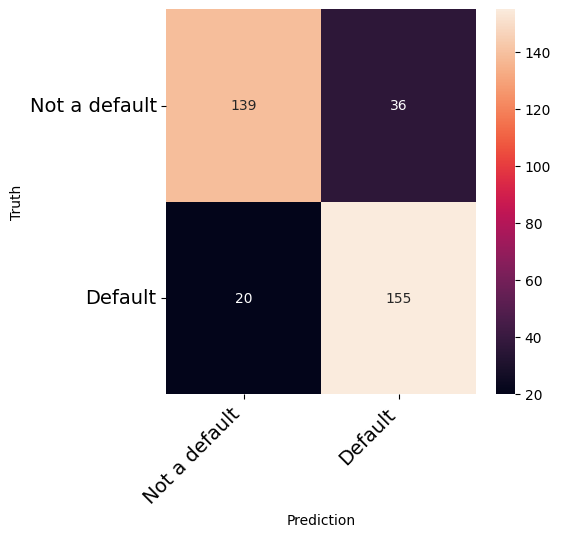

In [36]:
con_mat_rf_test = confusion_matrix(y_test, model.predict(x_test))
print_confusion_matrix(con_mat_rf_test,["Not a default","Default"])

In [37]:
Sensitivity = con_mat_rf_test[1,1]/(con_mat_rf_test[1,1]+con_mat_rf_test[1,0])
round(Sensitivity,4)

np.float64(0.8857)

In [38]:
Spacificity = con_mat_rf_test[0,0]/(con_mat_rf_test[0,0]+con_mat_rf_test[0,1])
round(Spacificity,4)

np.float64(0.7943)

In [22]:
# type I error: the model predicts tht you default but actually you are not
# type II error: the model predicts that you are Not default but you are.

## Decision Tree

In [39]:
start_time = time()
dt = DecisionTreeClassifier(random_state=15)
dt_model= dt.fit(x_train,y_train)
#dt.score(x_test,y_test)
print('The accuracy of the Decision Tree is: ', round(dt_model.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the Decision Tree is:  0.7857
----0.01489877700805664 seconds---


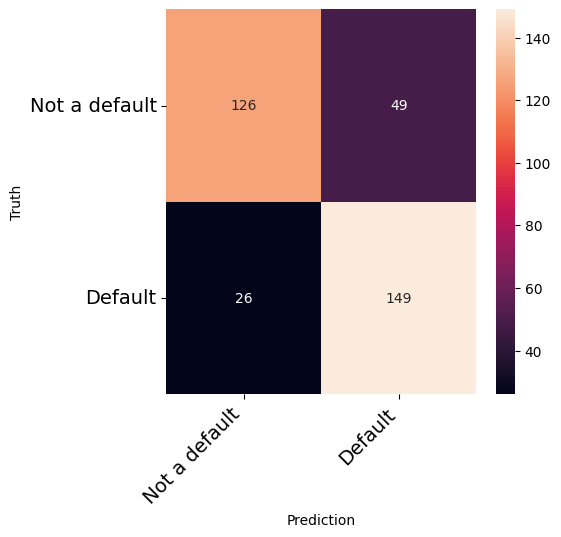

In [40]:
con_mat_dt_test = confusion_matrix(y_test, dt_model.predict(x_test))
print_confusion_matrix(con_mat_dt_test,["Not a default","Default"])

In [41]:
Sensitivity = con_mat_dt_test[1,1]/(con_mat_dt_test[1,1]+con_mat_dt_test[1,0])
round(Sensitivity,4)

np.float64(0.8514)

In [42]:
Spacificity = con_mat_dt_test[0,0]/(con_mat_dt_test[0,0]+con_mat_dt_test[0,1])
round(Spacificity,4)

np.float64(0.72)

In [43]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = dt_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       175
           1       0.75      0.85      0.80       175

    accuracy                           0.79       350
   macro avg       0.79      0.79      0.78       350
weighted avg       0.79      0.79      0.78       350



## Naive Bayes

In [49]:
start_time = time()
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
#gnb.score(x_test, y_test)
print('The accuracy of the KNeighbours is: ', round(gnb.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the KNeighbours is:  0.6829
----0.008435726165771484 seconds---


In [45]:
con_mat_gnb_test = confusion_matrix(y_test, gnb.predict(x_test))
con_mat_gnb_test

array([[119,  56],
       [ 55, 120]])

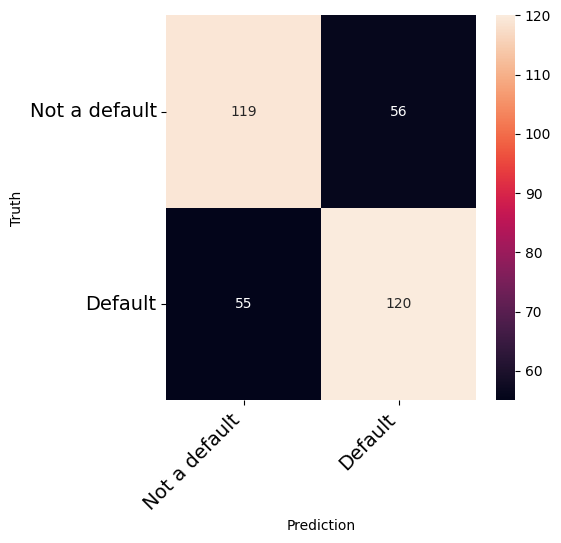

In [46]:
print_confusion_matrix(con_mat_gnb_test,["Not a default","Default"])

In [47]:
Sensitivity = con_mat_gnb_test[1,1]/(con_mat_gnb_test[1,1]+con_mat_gnb_test[1,0])
round(Sensitivity,4)

np.float64(0.6857)

In [48]:
Spacificity = con_mat_gnb_test[0,0]/(con_mat_gnb_test[0,0]+con_mat_gnb_test[0,1])
round(Spacificity,4)

np.float64(0.68)

In [50]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = gnb_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       175
           1       0.68      0.69      0.68       175

    accuracy                           0.68       350
   macro avg       0.68      0.68      0.68       350
weighted avg       0.68      0.68      0.68       350



## KNeighbours

In [55]:
start_time = time()
kn = KNeighborsClassifier(n_neighbors=5)
kn_model = kn.fit(x_train, y_train)
print('The accuracy of the KNeighbours is: ', round(kn.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the KNeighbours is:  0.6886
----0.01611328125 seconds---


In [52]:
con_mat_kn_test = confusion_matrix(y_test, kn.predict(x_test))
con_mat_kn_test

array([[110,  65],
       [ 44, 131]])

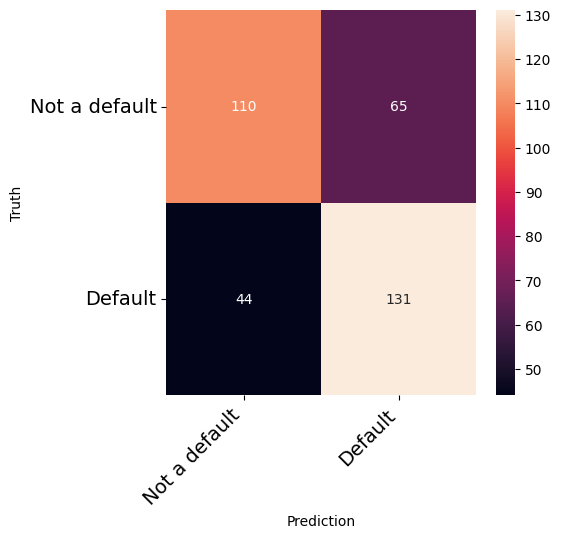

In [53]:
print_confusion_matrix(con_mat_kn_test,["Not a default","Default"])

In [35]:
Sensitivity = con_mat_kn_test[1,1]/(con_mat_kn_test[1,1]+con_mat_kn_test[1,0])
round(Sensitivity,4)

0.7486

In [36]:
Spacificity = con_mat_kn_test[0,0]/(con_mat_kn_test[0,0]+con_mat_kn_test[0,1])
round(Spacificity,4)

0.6286

In [56]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = kn_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       175
           1       0.67      0.75      0.71       175

    accuracy                           0.69       350
   macro avg       0.69      0.69      0.69       350
weighted avg       0.69      0.69      0.69       350



## Neural Network

In [57]:
start_time = time()
nn = MLPClassifier(random_state=15)
nn_model = nn.fit(x_train, y_train)
print('The accuracy of the Neural Network is: ', round(nn.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the Neural Network is:  0.7714
----1.0522878170013428 seconds---


c:\Users\Asus\Desktop\Credit Defauly & Business Monitor\bank_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
con_mat_nn_test = confusion_matrix(y_test, nn.predict(x_test))
con_mat_nn_test

array([[136,  39],
       [ 41, 134]])

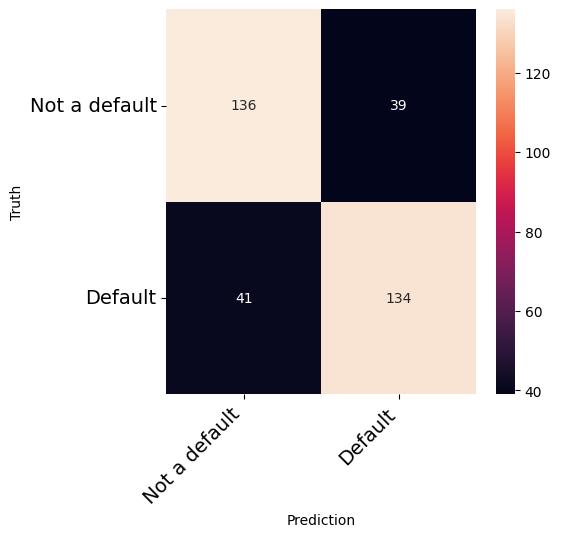

In [59]:
print_confusion_matrix(con_mat_nn_test,["Not a default","Default"])

In [40]:
Sensitivity = con_mat_nn_test[1,1]/(con_mat_nn_test[1,1]+con_mat_nn_test[1,0])
round(Sensitivity,4)

0.7657

In [41]:
Spacificity = con_mat_nn_test[0,0]/(con_mat_nn_test[0,0]+con_mat_nn_test[0,1])
round(Spacificity,4)

0.7771

In [60]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = nn_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       175
           1       0.77      0.77      0.77       175

    accuracy                           0.77       350
   macro avg       0.77      0.77      0.77       350
weighted avg       0.77      0.77      0.77       350



### Logistic Regression

In [61]:
start_time = time()
lr = LogisticRegression(random_state=15)
lr_model = lr.fit(x_train, y_train)
print('The accuracy of the LogReg is: ', round(lr.score(x_test,y_test),4))
end_time = time()
print("----%s seconds---" % (end_time - start_time))

The accuracy of the LogReg is:  0.6971
----0.038103342056274414 seconds---


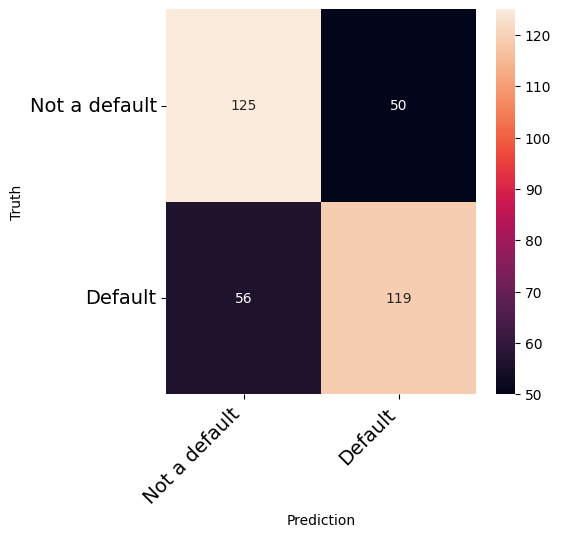

In [62]:
con_mat_lr_test = confusion_matrix(y_test, lr.predict(x_test))
print_confusion_matrix(con_mat_lr_test,["Not a default","Default"])

In [44]:
Sensitivity = con_mat_lr_test[1,1]/(con_mat_lr_test[1,1]+con_mat_lr_test[1,0])
round(Sensitivity,4)

0.68

In [45]:
Spacificity = con_mat_lr_test[0,0]/(con_mat_lr_test[0,0]+con_mat_lr_test[0,1])
round(Spacificity,4)

0.7143

In [63]:
# 4. Check if it's accurate
from sklearn.metrics import classification_report
predictions = lr_model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       175
           1       0.70      0.68      0.69       175

    accuracy                           0.70       350
   macro avg       0.70      0.70      0.70       350
weighted avg       0.70      0.70      0.70       350



In [64]:
# auc curve
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(x_test)
kn_probs = kn.predict_proba(x_test)
dt_probs = dt.predict_proba(x_test)
gnb_probs = gnb.predict_proba(x_test)
nn_probs = nn.predict_proba(x_test)
lr_probs = lr.predict_proba(x_test)

In [65]:
# Probabilities for the positive outcome is kept.
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
dt_probs = dt_probs[:,1]
gnb_probs = gnb_probs[:,1]
nn_probs = nn_probs[:,1]
lr_probs = lr_probs[:,1]

In [66]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [67]:
# print the values ander the curve
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('KNeighbours: AUROC = %.3f' % (kn_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('GaussianNB: AUROC = %0.3f' % (gnb_auc))
print('Nueral Network: AUROC = %.3f' % (nn_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.919
KNeighbours: AUROC = 0.773
Decision Tree: AUROC = 0.786
GaussianNB: AUROC = 0.722
Nueral Network: AUROC = 0.827
Logistic Regression: AUROC = 0.753


In [68]:
# Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test,nn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test,lr_probs)

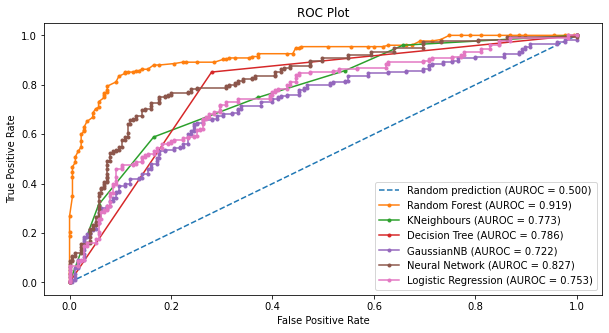

In [51]:
# Plot the ROC curve
plt.figure(figsize = (10,5))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KNeighbours (AUROC = %0.3f)' % kn_auc)
plt.plot(dt_fpr, dt_tpr, marker = '.', label = 'Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gnb_fpr, gnb_tpr, marker = '.', label = 'GaussianNB (AUROC = %0.3f)' % gnb_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network (AUROC = %0.3f)' % nn_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
plt.savefig('rand_1.pdf', dpi = 300)
# Show plot
plt.show()